In [1]:
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))

94765736/94765736 [==============================] - 3s 0us/step


In [3]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from keras.utils import plot_model
plot_model(model=resnet50, show_layer_activations=True, show_shapes=True, show_dtype=True)

In [5]:
# Flatten output layer of ResNet
flattened = Flatten()(resnet50.output)

# Fully Connected layer 1
fc1 = Dense(128, activation='relu', name='added_dense_1')(flattened)

# Fully Connected layer, output layer
fc2 = Dense(10, activation='softmax', name='added_dense_2')(fc1)

In [6]:
model = Model(inputs=resnet50.inputs, outputs=fc2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [7]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

170498071/170498071 [==============================] - 6s 0us/step


In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 117s 48ms/step - loss: 1.4317 - accuracy: 0.5082 - val_loss: 1.9086 - val_accuracy: 0.2570
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2923 - accuracy: 0.5481 - val_loss: 1.2101 - val_accuracy: 0.5832
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2794 - accuracy: 0.5526 - val_loss: 1.9900 - val_accuracy: 0.3874
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1827 - accuracy: 0.5871 - val_loss: 1.6526 - val_accuracy: 0.5204
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1177 - accuracy: 0.6120 - val_loss: 2.6216 - val_accuracy: 0.2536
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0451 - accuracy: 0.6389 - val_loss: 0.9298 - val_accuracy: 0.6823
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0453 - accuracy: 0.6378 - val_loss: 1.1357 

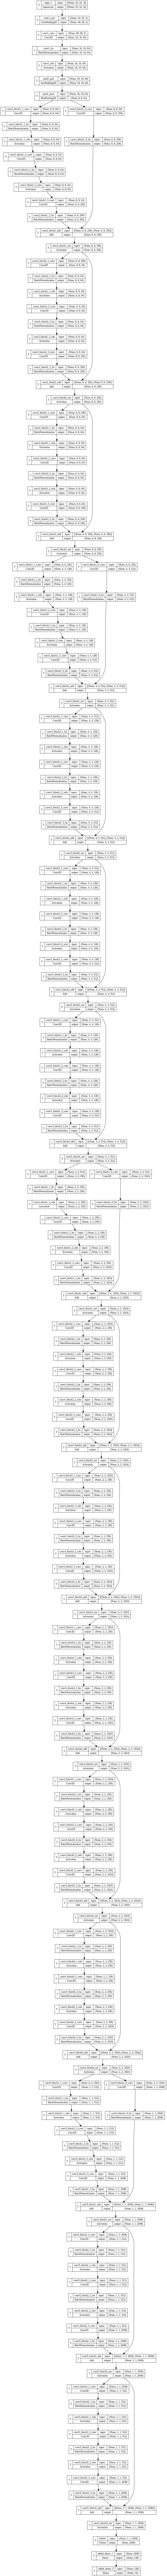

In [10]:
plot_model(model, show_layer_names=True, show_shapes=True, show_trainable=True, dpi=100)

In [11]:
for layer in model.layers:
    print(layer.trainable, end=' ')

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

In [12]:
model.trainable

True

In [13]:
resnet50.trainable = False

In [14]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

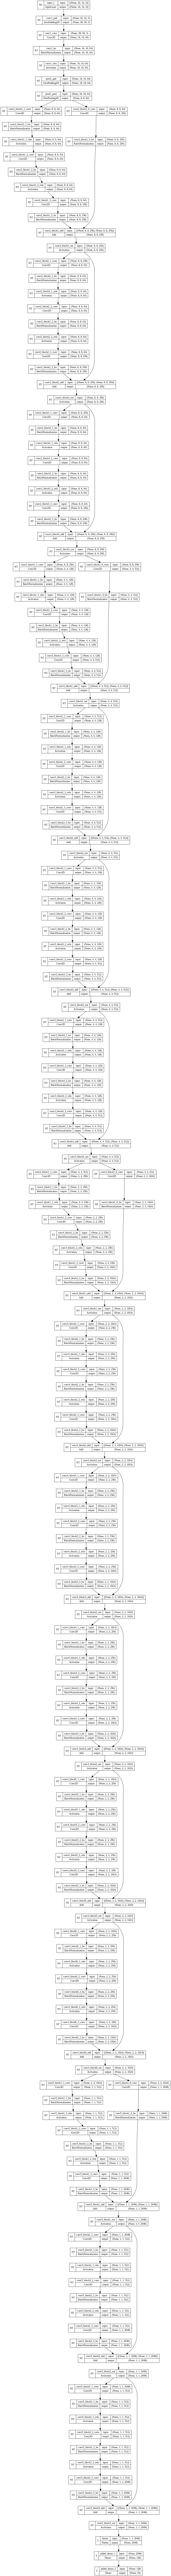

In [15]:
plot_model(model, show_layer_names=True, show_shapes=True, show_trainable=True, dpi=100)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.0917 - accuracy: 0.6245 - val_loss: 1.0931 - val_accuracy: 0.6173
Epoch 2/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0259 - accuracy: 0.6409 - val_loss: 1.0882 - val_accuracy: 0.6213
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0123 - accuracy: 0.6469 - val_loss: 1.0779 - val_accuracy: 0.6218
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0105 - accuracy: 0.6492 - val_loss: 1.0740 - val_accuracy: 0.6268
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9978 - accuracy: 0.6536 - val_loss: 1.0752 - val_accuracy: 0.6258
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9923 - accuracy: 0.6553 - val_loss: 1.0778 - val_accuracy: 0.6226
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9773 - accuracy: 0.6584 - val_loss: 1.0774 -